# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.4.1'

In [2]:
import io
from google.colab import files
upoaded = files.upload()

Saving creditcard.csv to creditcard (1).csv


In [18]:
df=pd.read_csv('creditcard.csv')
df.head

<bound method NDFrame.head of          Time        V1        V2        V3  ...       V27       V28  Amount  Class
0           0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1           0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2           1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3           1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4           2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0
...       ...       ...       ...       ...  ...       ...       ...     ...    ...
110334  71777 -0.548846 -0.256284  1.099196  ... -0.104091 -0.107875   29.00    0.0
110335  71777 -0.593114  1.195313  1.185347  ... -0.052265 -0.023921   29.00    0.0
110336  71778  1.054948  0.009004  0.370250  ...  0.044926  0.002609   19.82    0.0
110337  71779 -0.392247  1.041567  1.253335  ...  0.258191  0.094308    6.56    0.0
110338  71779 -3.854371  2.953106 -0.226679  .

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
x=df[['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V23','V24','V25','V26','V27','V28','Amount']].values

In [5]:
y=df[['Class']].values

In [10]:
y.astype('float32')

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [ 0.],
       [ 0.],
       [nan]], dtype=float32)

In [9]:
x.astype('float32')

array([[ 0.0000000e+00, -1.3598071e+00, -7.2781175e-02, ...,
         1.3355838e-01, -2.1053053e-02,  1.4962000e+02],
       [ 0.0000000e+00,  1.1918571e+00,  2.6615071e-01, ...,
        -8.9830989e-03,  1.4724169e-02,  2.6900001e+00],
       [ 1.0000000e+00, -1.3583541e+00, -1.3401631e+00, ...,
        -5.5352796e-02, -5.9751842e-02,  3.7866000e+02],
       ...,
       [ 7.1778000e+04,  1.0549479e+00,  9.0040006e-03, ...,
         4.4925664e-02,  2.6086648e-03,  1.9820000e+01],
       [ 7.1779000e+04, -3.9224675e-01,  1.0415673e+00, ...,
         2.5819051e-01,  9.4307877e-02,  6.5599999e+00],
       [ 7.1779000e+04, -3.8543706e+00,  2.9531062e+00, ...,
                   nan,            nan,            nan]], dtype=float32)

In [23]:
y[110338]=0

In [24]:
y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [34]:
col_mean=np.nanmean(x,axis=0)
index=np.where(np.isnan(x))
x[index]=np.take(col_mean,index[1])

In [35]:
index

(array([110338, 110338, 110338, 110338, 110338, 110338, 110338, 110338,
        110338, 110338, 110338]),
 array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]))

In [36]:
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 7.17780000e+04,  1.05494782e+00,  9.00400085e-03, ...,
         4.49256632e-02,  2.60866470e-03,  1.98200000e+01],
       [ 7.17790000e+04, -3.92246754e-01,  1.04156728e+00, ...,
         2.58190502e-01,  9.43078785e-02,  6.56000000e+00],
       [ 7.17790000e+04, -3.85437056e+00,  2.95310612e+00, ...,
         1.45714373e-03,  1.83843325e-03,  9.57788446e+01]])

In [37]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size=0.30, random_state=42,shuffle=True)

In [39]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [51]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers
from keras import losses
from keras import metrics
model=models.Sequential()
model.add(layers.Dense(10,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu'))
model.add(layers.Dense((1),activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [42]:
train_data.shape

(77237, 31)

In [53]:
validation_data=train_data[:15447]
validation_label=train_label[:15447]
partial_train_data=train_data[15448:]
partial_train_label=train_label[15448:]

In [64]:
history=model.fit(partial_train_data,partial_train_label,epochs=100,batch_size=28, validation_data=(validation_data,validation_label))
history_dic= history.history
history_dic.keys()


Epoch 1/100
2207/2207 [==============================] - 3s 1ms/step - loss: 0.0178 - binary_accuracy: 0.9977 - val_loss: 0.0148 - val_binary_accuracy: 0.9980
Epoch 2/100
2207/2207 [==============================] - 3s 1ms/step - loss: 0.0174 - binary_accuracy: 0.9977 - val_loss: 0.0159 - val_binary_accuracy: 0.9980
Epoch 3/100
2207/2207 [==============================] - 3s 1ms/step - loss: 0.0175 - binary_accuracy: 0.9977 - val_loss: 0.0161 - val_binary_accuracy: 0.9980
Epoch 4/100
2207/2207 [==============================] - 3s 1ms/step - loss: 0.0175 - binary_accuracy: 0.9977 - val_loss: 0.0156 - val_binary_accuracy: 0.9980
Epoch 5/100
2207/2207 [==============================] - 3s 1ms/step - loss: 0.0179 - binary_accuracy: 0.9977 - val_loss: 0.0158 - val_binary_accuracy: 0.9980
Epoch 6/100
2207/2207 [==============================] - 3s 1ms/step - loss: 0.0174 - binary_accuracy: 0.9977 - val_loss: 0.0169 - val_binary_accuracy: 0.9980
Epoch 7/100
2207/2207 [=======================

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

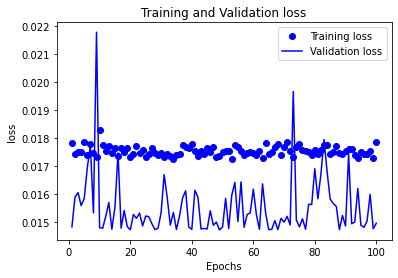

In [65]:
import matplotlib.pyplot as plt
loss_values=history_dic['loss']
acc=history_dic['binary_accuracy']
val_loss_values=history_dic['val_loss']
epochs=range(1,101)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
model.fit(train_data,train_label,epochs=20,batch_size=16)
results=model.evaluate(test_data,test_label)

Epoch 1/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0186 - binary_accuracy: 0.9978
Epoch 2/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0196 - binary_accuracy: 0.9978
Epoch 3/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0199 - binary_accuracy: 0.9978
Epoch 4/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0188 - binary_accuracy: 0.9978
Epoch 5/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0196 - binary_accuracy: 0.9978
Epoch 6/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0198 - binary_accuracy: 0.9978
Epoch 7/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0196 - binary_accuracy: 0.9978
Epoch 8/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0192 - binary_accuracy: 0.9978
Epoch 9/20
4828/4828 [==============================] - 6s 1ms/step - loss: 0.0187 - binary_accuracy: 0.9978
Epoch 10/20
4828/48

In [67]:
results

[0.014870771206915379, 0.9980061650276184]

In [68]:
model.predict(test_data)

array([[0.00127769],
       [0.00127769],
       [0.00127769],
       ...,
       [0.00127769],
       [0.00127769],
       [0.00127769]], dtype=float32)

In [69]:
test_label

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])